In [1]:
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def getDataset(filename):
    import os
    if filename not in os.listdir():
        !pip3 install wget
        import wget
        url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
        downloaded_filename = wget.download(url)
        print(f'{downloaded_filename} file downloaded')
    else:
        print(f'{filename} already exists')
        
getDataset('p4dataset2021.txt')

p4dataset2021.txt already exists


## Read Dataset

In [3]:
'''
Each of the 995 lines in the file represents an individual. 
The first three columns represent:
- individual’s unique identifier
- his/her sex (1=male, 2=female) 
- population he or she belongs to. 

The subsequent 10101 columns of each line are a subsample of nucleobases from the individual’s genome.
'''

df = pd.read_csv('p4dataset2021.txt', header=None, delim_whitespace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,HG01879,1,ACB,G,G,T,T,A,A,C,...,T,A,T,A,A,T,T,T,G,A
1,HG01880,2,ACB,A,A,T,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G
2,HG01881,2,ACB,A,A,T,T,A,A,G,...,G,C,T,G,A,T,C,T,G,G
3,HG01882,1,ACB,A,A,T,C,A,A,G,...,G,A,T,G,A,T,C,T,G,G
4,HG01883,2,ACB,G,A,T,C,G,A,C,...,G,C,T,G,A,T,C,T,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,NA20361,2,ASW,G,G,T,T,A,G,C,...,G,A,T,G,A,T,C,T,G,G
991,NA20362,1,ASW,G,A,T,T,A,G,C,...,G,A,T,G,A,T,C,T,G,G
992,NA20364,2,ASW,A,A,G,C,G,G,G,...,G,A,T,G,A,T,C,T,G,G
993,NA20412,2,ASW,G,G,G,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G


In [4]:
#we'll separate gender and population to separate columns

gender = df[1]
population = df[2]
print(np.unique(gender), np.unique(population))
df.drop(df.columns[[0, 1, 2]],axis=1,inplace=True)

[1 2] ['ACB' 'ASW' 'ESN' 'GWD' 'LWK' 'MSL' 'YRI']


In [5]:
set(df.iloc[0].values)

{'A', 'C', 'G', 'T'}

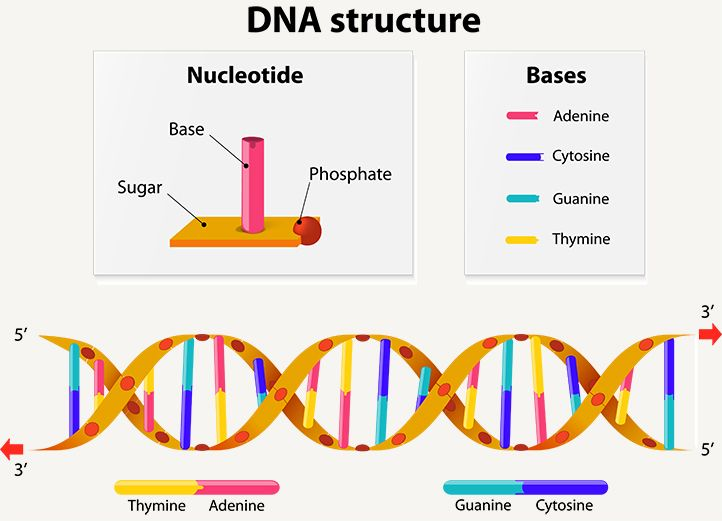

In [21]:
'''
Humans and chimps share a surprising 98.8 percent of their DNA. 
Regarding this, let's create a matrix, that will represent mutations away from mode, rather than work with genome itself.
'''
modes = np.array(df.mode().values[0,:])
dif_matrix = np.where(df.to_numpy()!=modes, 1, 0)

In [7]:
dif_matrix

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

OK. At the moment we have a matrix that represent how different is each row regards to mode.
We have 995 rows and 10001 columns. Time for PCA

## PCA

In [16]:
n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(dif_matrix)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.0543
Individual variance contributions:
0.00569444730994134
0.00463994838987017
0.003737932762914169
0.003315716492637202
0.0027035073468918928
0.0025540773624055033
0.002411504057741076
0.0023767952532595875
0.0023187851555614954
0.0023017773723772628
0.0022947424821496633
0.0022614572631797125
0.0022526008600540375
0.002244741551711314
0.002233462306248214
0.002224832197912109
0.002207762065697072
0.0022001598005078633
0.0021895766979205295
0.002183469812038628


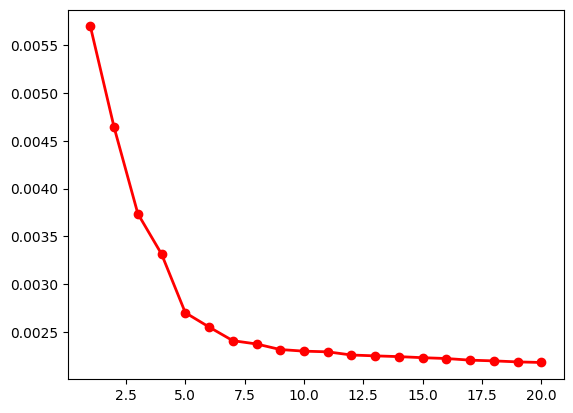

In [17]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.show()

In [48]:
#Data points projection along PCs
projected1 = np.matmul(mutation_matrix, pca.components_[0])
projected2 = np.matmul(mutation_matrix, pca.components_[1])
projected3 = np.matmul(mutation_matrix, pca.components_[2])
projected4 = np.matmul(mutation_matrix, pca.components_[3])
projected5 = np.matmul(mutation_matrix, pca.components_[4])


## PCA analysis

In [31]:
def groupComponents(x, y, classLabels, x_name='PC1', y_name='PC2'):   
    classDict = {}
    classes = np.unique(classLabels)
    for label in classes:
        idx = np.where(classLabels == label)
        classDict[label] = (x[idx], y[idx])
    for lab in classes:
        x, y = classDict[lab]
        plt.scatter(x, y, label=lab,alpha=0.4)
    plt.legend(fontsize=12)
    plt.xlabel(f'Projection on {x_name}', fontsize=12)
    plt.ylabel(f'Projection on {y_name}', fontsize=12)
    
    plt.show()

### Population Group

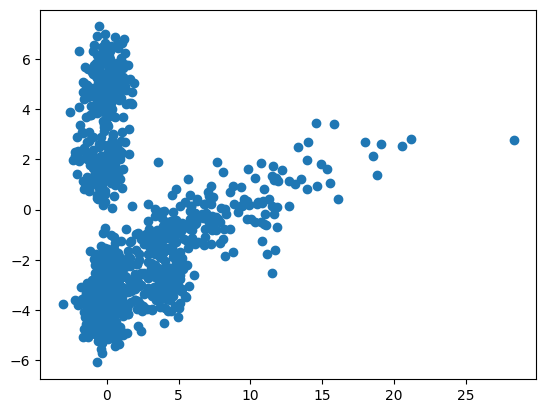

In [38]:
plt.scatter(projected1, projected2)
plt.show()

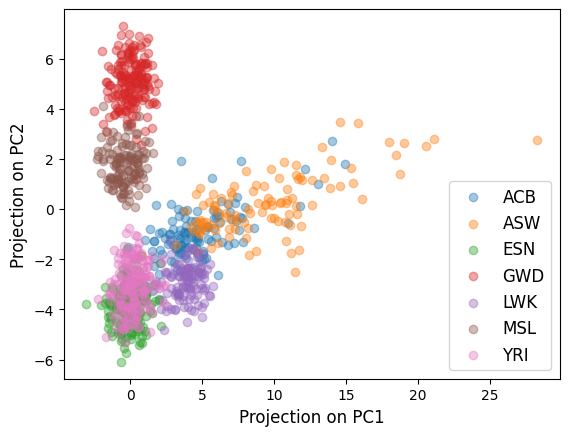

In [32]:
groupComponents(projected1, projected2, population)

Clustering by Population Group may mean two things, with the similar-different rule:
- individuals of particular population have similar gene mutations
- individuals in different populations have mutations in different nucleobases

Correlation between the PC1 and PC2 for members of a population helps cluster them into groups. They capture varibility in genes due to population differences.

### Gender Group

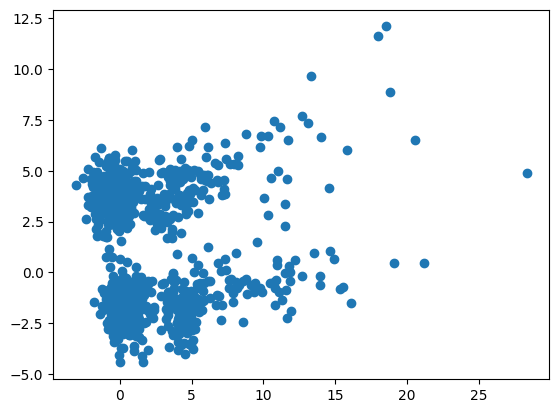

In [39]:
plt.scatter(projected1, projected3)
plt.show()

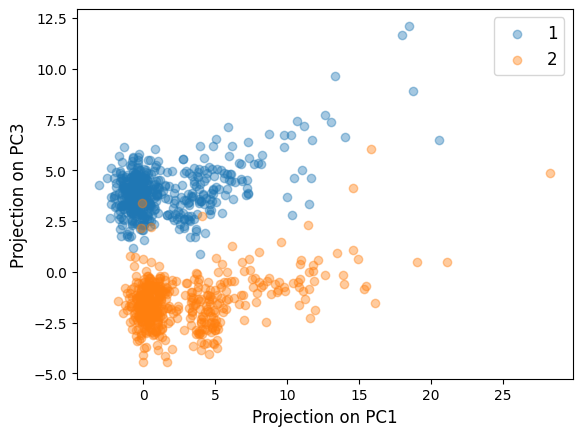

In [42]:
groupComponents(projected1, projected3, gender, x_name='PC1', y_name='PC3')

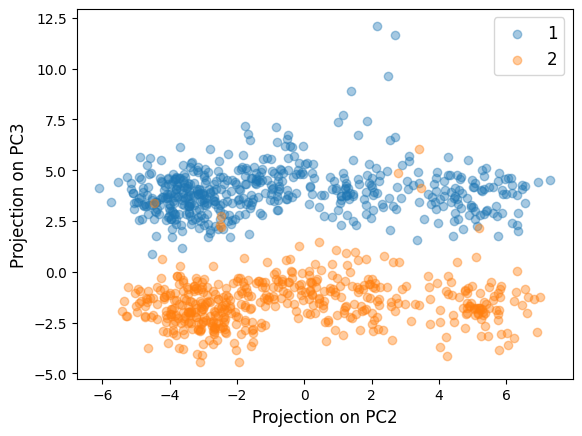

In [44]:
groupComponents(projected2, projected3, gender, x_name='PC2', y_name='PC3')

There is a strong correlation between data members within the male and within the female sections

### Several more plots

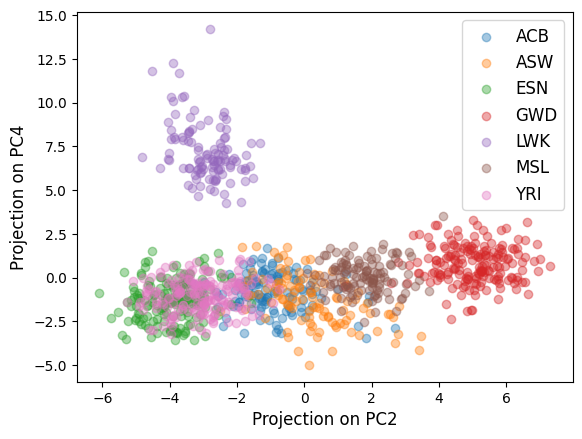

In [60]:
groupComponents(projected2, projected4, population, x_name='PC2', y_name='PC4')

One can notice how LWK cluster is different ftom the others on the PC2-PC4 plot. Something makes that cluster special.

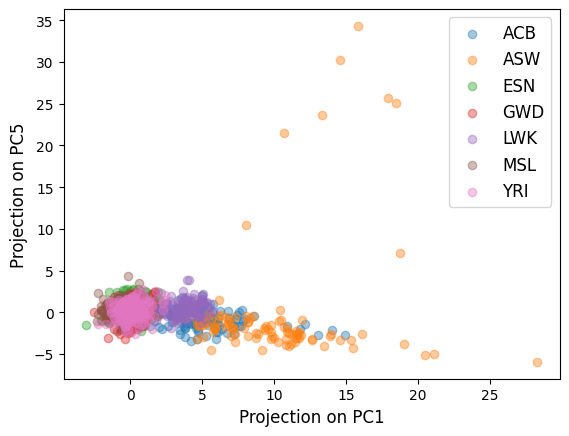

In [61]:
groupComponents(projected1, projected5, population, x_name='PC1', y_name='PC5')

Quite interesting how the distributions of different cluster vary. Notice some data anomalies for the ASW cluster

## Nucleobase explanation

In [75]:
expl_df = pd.DataFrame(pca.components_.T[:, :5], columns=[f'PC{x}' for x in range(1,5+1)], index=df.columns)
expl_df

,PC1,PC2,PC3,PC4,PC5
3,-0.007853,-0.006458,0.003079,0.004831,-0.000472
4,-0.000401,0.012973,-0.000137,-0.015279,-0.010085
5,-0.002479,0.005079,0.002375,-0.002226,0.012301
6,0.017810,0.005209,0.003311,-0.003376,-0.006152
7,-0.017816,-0.001605,-0.011171,0.011425,-0.008736
...,...,...,...,...,...
10099,0.002067,0.000475,0.002028,-0.000436,-0.001322
10100,0.010518,0.000917,0.011491,-0.002357,0.002171
10101,0.002067,0.000475,0.002028,-0.000436,-0.001322
10102,-0.000202,-0.000266,0.000347,-0.000029,-0.000078


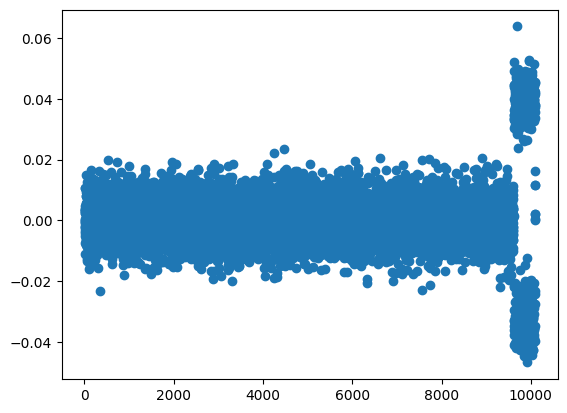

In [82]:
plt.scatter(expl_df.index, expl_df['PC3'])
plt.show()

Additional reading:
- http://bwlewis.github.io/1000_genomes_examples/PCA_overview.html